# 4.16.39 Data Distribution

### Visualising the distribution of your data

The statistics we’ve covered in our previous class summarise well the data to a single number that describes the location or the dispersion of our data series. It is also useful to visually explore the complete distribution of the data.

There are several ways to visualise the distribution of a dataset, we will see the most widespread and useful options available. 

<img src="img/distr-charts.png" width="600">

### The Box and Whisker Plot

Also known as Box Plot, a Box and Whisker Plot is a very useful and fast way of visually displaying the data distribution (locality, dispersion and skewness) through their quartiles. It was first introduced by John Tukey in 1970, who later published on the subject in his book *Exploratory Data Analysis* in 1977.

<img src="img/boxplot-anatomy.png" width="700">

Let's see **how to read** a Box Plot by describing its anatomy: 

- the **box in the middle** is defined by three vertical lines that indicate (from left to right) the 25th, 50th (median) and 75th percentile (that is, the 1st, 2nd and 3rd quartile);
- the horizontal lines extending parallel from the boxes are known as the **whiskers**, which are used to indicate variability outside the upper and lower quartiles; 
- the whiskers extend to the furthest point beyond the box, except that they will not go beyond **1.5 times the IQR** (depending on the software used, this rule may change); 
- very **extreme values** and **potential outliers** are sometimes plotted as individual dots that are in-line with whiskers; 
- box plots can be drawn either vertically or horizontally.

Although Box Plots may seem simple in comparison to a Histogram or Density Plot, their advantage is that they are more compact and explicit, which comes in handy when comparing data across different groups or categories.

So **what can we understand** about our data when looking at a Box Plot? 

- with a single glance we can get an idea of what the key statistics are, such as the median, IQR, quartiles and more; 
- how clustered or dispersed the data is;
- if there are any outliers and what their values are; 
- if the data is symmetrical or skewed and if so, in what direction. 

Let's see a **practical example**. We've briefly seen the `planets` dataset in the homework assignment, whose data come from NASA's [Exoplanet Exploration program](https://exoplanets.nasa.gov/discovery/exoplanet-catalog/). The dataset includes some recorded metrics like `orbital_period`, `mass` and `distance`. Each observation is also identified by its `method` of discovery (check out [this page](https://exoplanets.nasa.gov/discovery/how-we-find-and-characterize/) for more details on that). 

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
planets = sns.load_dataset('planets')
print('DataFrame size:', planets.shape)
planets.head(3)

DataFrame size: (1035, 6)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011


In the homework assignment we looked at some descriptive statistics for the `distance` metric as a whole. Let's briefly recap what we discovered in the homework and then visualise the same information using a box plot. 

In [3]:
planets.distance.describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

<AxesSubplot:xlabel='distance'>

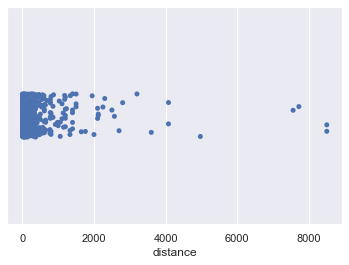

In [4]:
sns.stripplot(x = 'distance', data = planets)

Let's create a box plot of the `distance` metric: 

<AxesSubplot:xlabel='distance'>

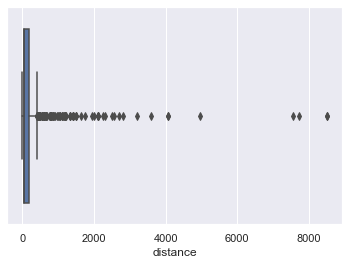

In [5]:
sns.boxplot(x='distance', data=planets)

It doesn't really look like what we saw in the diagram above; in fact, it is all squeezed to the left. This is because 75% of the data is lies between 1.35 and 178.5 (see min and 75% in the output of the `.describe()` method), all the rest are extreme values that skew the data creating a long tail on the right-side of the distribution. 

Although it is not a problem per se, it would make sense to describe the `distance` variable **within each group** of the `method` used. We can do that by grouping the DataFrame by the `method` used, aggregating by the `distance` metric and finally calling the `.describe()` method on the resulting DataFrame. 

In [6]:
planets.groupby('method')['distance'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,17.875000,4.094148,14.98,16.4275,17.875,19.3225,20.77
Eclipse Timing Variations,4.0,315.360000,213.203907,130.72,130.7200,315.360,500.0000,500.00
Imaging,32.0,67.715937,53.736817,7.69,22.1450,40.395,132.6975,165.00
Microlensing,10.0,4144.000000,2076.611556,1760.00,2627.5000,3840.000,4747.5000,7720.00
Orbital Brightness Modulation,2.0,1180.000000,0.000000,1180.00,1180.0000,1180.000,1180.0000,1180.00
Pulsar Timing,1.0,1200.000000,NaN,1200.00,1200.0000,1200.000,1200.0000,1200.00
Pulsation Timing Variations,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Radial Velocity,530.0,51.600208,45.559381,1.35,24.4125,40.445,59.2175,354.00
Transit,224.0,599.298080,913.876990,38.00,200.0000,341.000,650.0000,8500.00


We can also use the `sns.stripplot()` function to visualise each group by including `y = 'method'` as a parameter:

<AxesSubplot:xlabel='distance', ylabel='method'>

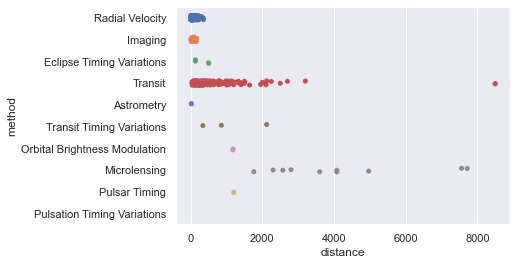

In [7]:
sns.stripplot(x = 'distance', y = 'method', data = planets)

Similarly, we can generate a series of box plots by including the same `y = 'method'` parameter in the `sns.boxplot()` function call: 

<AxesSubplot:xlabel='distance', ylabel='method'>

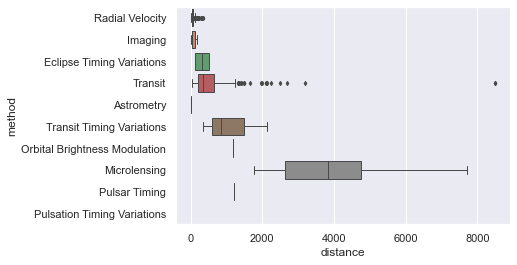

In [8]:
sns.boxplot(x = 'distance', y = 'method', data = planets, fliersize=3, linewidth=1)

Let's look at a single box plot, particularly, let's look at the "Radial Velocity" `method`: 

<AxesSubplot:xlabel='distance', ylabel='method'>

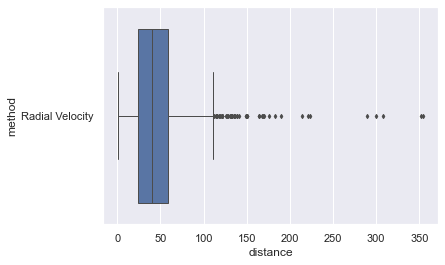

In [9]:
sns.boxplot(x = 'distance', y = 'method', data = planets[planets.method=='Radial Velocity'], fliersize=3, linewidth=1)

<AxesSubplot:xlabel='distance', ylabel='method'>

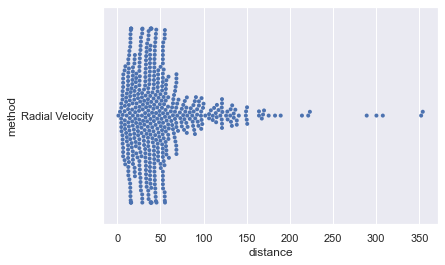

In [10]:
sns.swarmplot(x = 'distance', y = 'method', data = planets[planets.method=='Radial Velocity'], size = 4)

<AxesSubplot:xlabel='distance', ylabel='method'>

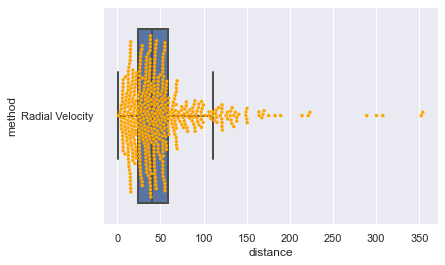

In [11]:
sns.boxplot(x = 'distance', y = 'method', data = planets[planets.method=='Radial Velocity'], fliersize=0, linewidth=2)
sns.swarmplot(x = 'distance', y = 'method', data = planets[planets.method=='Radial Velocity'], size = 3.5, color = 'orange')

Let's use the `year` of discovery variable to create a new `century` column that divides our observations in "20th" and "21st" cetury so that we can use this new categorical variable to check for differences in the two distributions.  

In [12]:
planets['century'] = ['20th' if el < 2000 else '21th' for el in planets.year]

In [13]:
planets.sample(5)

,method,number,orbital_period,mass,distance,year,century
326,Radial Velocity,2,342.850000,0.6579,32.58,2008,21th
361,Radial Velocity,2,379.100000,2.2500,94.61,2005,21th
335,Radial Velocity,1,4.943700,0.1150,40.73,2002,21th
559,Radial Velocity,1,1136.100000,5.9300,62.11,2002,21th
628,Radial Velocity,3,6.673855,3.8800,52.88,2005,21th


<AxesSubplot:xlabel='distance', ylabel='method'>

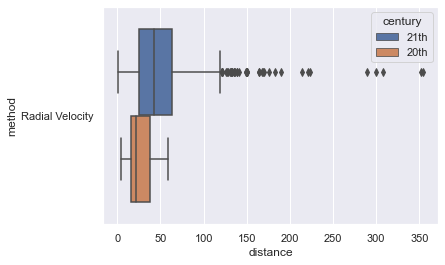

In [14]:
sns.boxplot(x = 'distance', y = 'method', hue = 'century', data = planets[planets.method=='Radial Velocity'])

It looks like objects discovered in the 20th Century have a shorter distance from earth; this makes sense, since telescope's technology and ability to look further has drastically increased in the last decades. 

#### Exercise

Jupiter is by far the most massive planet in the Solar System. It is approximately 2.5 times as massive as all of the other planets in the Solar System combined. **Jupiter mass** is the unit of mass equal to the total mass of the planet Jupiter and it is used to describe masses of gas giants, such as the outer planets and exoplanets. 

The mass variable in our dataset is expressed in Jupiters, so it could be interesting to create a new variable `jupiters` that classifies our observations in whether they have a mass greater or inferior to 1 Jupiter. 

In [15]:
planets.mass.describe()

count    513.000000
mean       2.638161
std        3.818617
min        0.003600
25%        0.229000
50%        1.260000
75%        3.040000
max       25.000000
Name: mass, dtype: float64

In [16]:
planets['jupiters'] = ['up to 1 Jupiter' if el<=1 else 'over 1 Jupiter' for el in planets.mass]

In [17]:
planets.head()

,method,number,orbital_period,mass,distance,year,century,jupiters
0,Radial Velocity,1,269.300,7.10,77.40,2006,21th,over 1 Jupiter
1,Radial Velocity,1,874.774,2.21,56.95,2008,21th,over 1 Jupiter
2,Radial Velocity,1,763.000,2.60,19.84,2011,21th,over 1 Jupiter
3,Radial Velocity,1,326.030,19.40,110.62,2007,21th,over 1 Jupiter
4,Radial Velocity,1,516.220,10.50,119.47,2009,21th,over 1 Jupiter


<AxesSubplot:xlabel='distance', ylabel='century'>

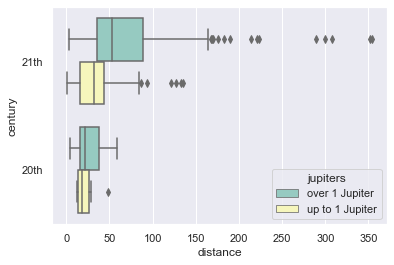

In [18]:
sns.boxplot(x = 'distance', y = 'century', hue = 'jupiters', data = planets[planets.method=='Radial Velocity'], palette="Set3")

### Frequency tables and  Histograms

A **frequency table** of a variable divides up the variable range into equally spaced segments (also known as **bins**), and counts how many observations fall in each segment. 

> Similarly to percentiles, also frequency tables summarize the data by creating bins. However, while quartiles and deciles will have the same count of observations in each bin (but the bin sizes will be different), the frequency table will have different counts in each bins (but equally spaced bins).

Let's take the `distance` variable from our `planets` dataset and create a new column `bins` that divides the metric's range in 10 equal parts. The `pd.cut()` function from the `pandas` library allows us to do just that: 

In [19]:
planets['distance'].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [20]:
planets['bins'] = pd.cut(x=planets['distance'], bins=10)
# To fix the negative bins issue: 
first_I = planets['bins'].cat.categories[0]
new_I = pd.Interval(min(planets['distance']), first_I.right)
planets['bins'] = planets['bins'].cat.rename_categories({first_I: new_I})

In [21]:
planets.sample(3)

,method,number,orbital_period,mass,distance,year,century,jupiters,bins
965,Transit,1,4.954658,NaN,140.00,2008,21th,over 1 Jupiter,"(1.35, 851.215]"
348,Radial Velocity,2,152.600000,0.17,35.59,2011,21th,up to 1 Jupiter,"(1.35, 851.215]"
582,Radial Velocity,1,279.800000,1.37,90.33,2008,21th,over 1 Jupiter,"(1.35, 851.215]"


At this point, we can generate the **frequency table** using the `.value_counts()` method on the `bins` column:

In [22]:
planets.bins.cat.categories.tolist()

[Interval(1.35, 851.215, closed='right'),
 Interval(851.215, 1701.08, closed='right'),
 Interval(1701.08, 2550.945, closed='right'),
 Interval(2550.945, 3400.81, closed='right'),
 Interval(3400.81, 4250.675, closed='right'),
 Interval(4250.675, 5100.54, closed='right'),
 Interval(5100.54, 5950.405, closed='right'),
 Interval(5950.405, 6800.27, closed='right'),
 Interval(6800.27, 7650.135, closed='right'),
 Interval(7650.135, 8500.0, closed='right')]

In [23]:
planets.bins.value_counts()

(1.35, 851.215]        753
(851.215, 1701.08]      33
(1701.08, 2550.945]     10
(2550.945, 3400.81]      4
(3400.81, 4250.675]      3
(7650.135, 8500.0]       3
(4250.675, 5100.54]      1
(6800.27, 7650.135]      1
(5100.54, 5950.405]      0
(5950.405, 6800.27]      0
Name: bins, dtype: int64

A **histogram** is a way to visualize a frequency table, with bins on the horizontal axis and the count of observations on the vertical axis. Histograms are plotted such that:

- all bins have the **same width**;
- the **number of bins** is decided by the analyst;
- **empty bins** are kept in the chart.

Technically, we can use a bar plot to visualise the frequency table: 

<AxesSubplot:>

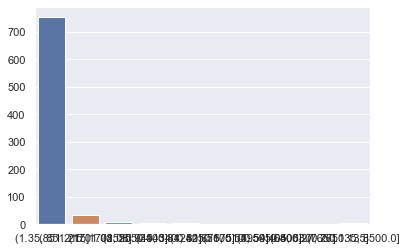

In [24]:
sns.barplot(x = planets.bins.value_counts().index, 
            y = planets.bins.value_counts().values)

But luckily for us, the `seaborn` library comes with a handy `sns.histplot()` [function](https://seaborn.pydata.org/generated/seaborn.histplot.html):

<AxesSubplot:xlabel='distance', ylabel='Count'>

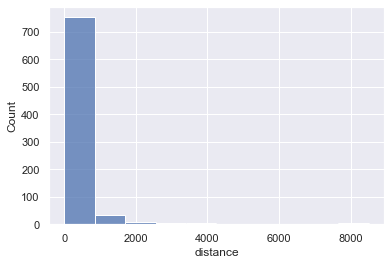

In [25]:
sns.histplot(x = 'distance', data = planets, bins = 10)

The `stat` parameter allows you to choose between different statistics, such as `count` or `frequency` to be used as the y-axis metric; for instance, the frequency option shows the number of observations divided by the number of bin.

<AxesSubplot:xlabel='distance', ylabel='Frequency'>

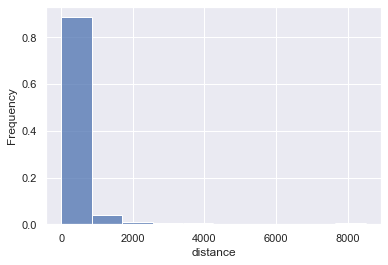

In [26]:
sns.histplot(x = 'distance', data = planets, bins = 10, stat = 'frequency')

In statistics, location and variability are referred to as the **first and second moments** of a distribution. The **third and fourth moments** are called [skewness](https://en.wikipedia.org/wiki/Skewness) and [kurtosis](https://en.wikipedia.org/wiki/Kurtosis): 

- **skewness** is a measure of lack of symmetry, it refers to whether the bulk of the data is shifted to larger or smaller values; 
- **kurtosis** is a measure of whether the data tends to have heavy tails (that is, to have extreme values or outliers). 

Although it is possible to measure skewness and kurtosis, it is common practice to evaluate these two characteristics of the data using visual aids such as box plots, histograms and density plots. 

<img src="img/skewness-kurtosis.png" width="900">

As an example, let's plot the histogram of the `mass` column:

Skewness: 2.543359704198928
Kurtosis: 7.464956085798233


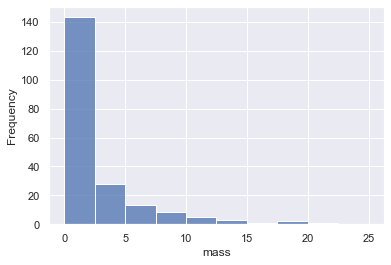

In [27]:
sns.histplot(x = 'mass', data = planets, bins = 10, stat = 'frequency')
print('Skewness:', stats.skew(planets.mass.dropna()))
print('Kurtosis:', stats.kurtosis(planets.mass.dropna()))

From a quick visual analysis we can conclude that the distribution of the `mass` variable is **positively skewed** and **leptokurtic**:

- it is clear that is is not symmetric, in fact the bulk of the data lays on the left side of the x-axis; in such cases we say that the distribution is **postively skewed**, as opposed to a **negatively skewed** distribution (which would have the hump on the right-side. The Normal distribution (which we'll cover in a future class) is **symmetric** and therefore has a **skewness of zero**; 
- the kurtosis can be detected by how "tall" or "flat" the peak of the distribution is; a "slim and tall" distribution (like the one we're analysing now) will have a high kurtosis and is called **leptokurtic**, as opposed to a "fat and short" distribution that will have a low kurtosis and is called **platikurtic**. The Normal distribution is said to be **mesokurtic** and, with a **kurtosis of 3** is somewhere in between. 

### Density plots

A **density plot**, can be thought of as a smoothed version of a histogram and shows the distribution of data values as a continuous line. It is typically computed directly from the data using a particular function known technically as a [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation). 

Let's load the `penguins` dataset from the `seaborn` library and plot a histogram together with a density plot of the `bill_length_mm` variable using the `kde=True` parameter in the `sns.histplot()` function: 

In [4]:
peng = sns.load_dataset('penguins')
peng.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


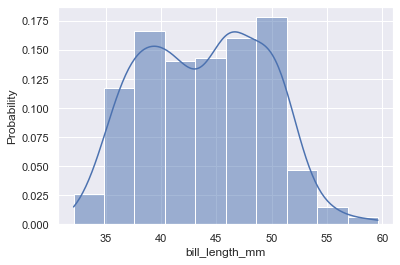

In [29]:
sns.histplot(x = 'bill_length_mm', data = peng, bins = 10, stat = 'probability', kde = True)
plt.show()

The distribution of the `bill_length_mm` variable has an interesting shape, it looks like the back of a camel with those two humps. Technically, we say that this is a [bimodal distribution](https://en.wikipedia.org/wiki/Multimodal_distribution), which means (as the word suggests) that the data has two modes. This could be a first red flag that maybe we should **look at this data at a different level of aggregation**, for instance checking for differences between `species` or `sex`. 

Let's use this cue to look at the `bill_length_mm` across the three different `species` of penguins availabe; this time we'll use the `sns.kdeplot()` function:

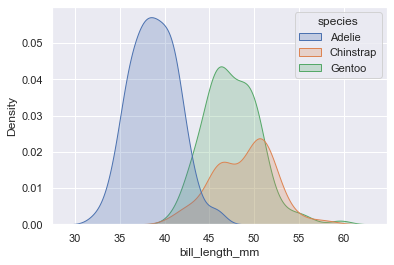

In [30]:
sns.kdeplot(x = 'bill_length_mm', data = peng, hue = 'species', fill = True)
plt.show()

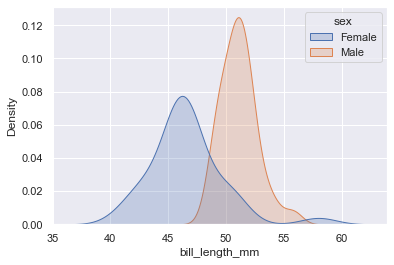

In [31]:
sns.kdeplot(x = 'bill_length_mm', data = peng[peng.species=='Chinstrap'], hue = 'sex', fill = True)
plt.show()

### Bivariate distributions

So far we have looked at **univariate distributions**, that is, how the data of a single variable behaves in its own range of variation. It may be interesting to look at how the data from this single variable interacts with a second variable; just like when we use a scatterplot to visualise the relationship between two bariables, we can compute what is technically known as the [joint probability distribution](https://en.wikipedia.org/wiki/Joint_probability_distribution) between these two variables in order to evaluate the probability distribution on all possible pairs of outputs. 

This is known as a **bivariate distribution**; the `sns.histplot()` and `sns.kdeplot()` functions support bivariate plots by simpling adding a `y=` parameter; let's have a look at the bivariate distribution between the `bill_length_mm` and the `bill_depth_mm` variables: 

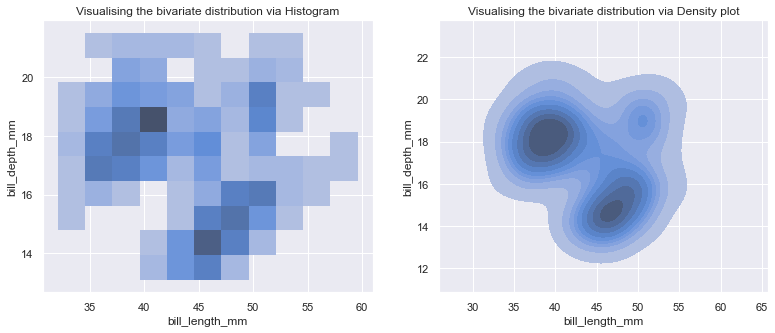

In [32]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

sns.histplot(x = 'bill_length_mm', y = 'bill_depth_mm', data = peng, ax = ax[0]).set_title("Visualising the bivariate distribution via Histogram")
sns.kdeplot(x = 'bill_length_mm', y = 'bill_depth_mm', data = peng, ax = ax[1], fill=True).set_title("Visualising the bivariate distribution via Density plot")
plt.show()

Similarly to what we did with the univariate distribution, we can use the `hue=` parameter to group the data and produce separate distribution for each aggregation: 

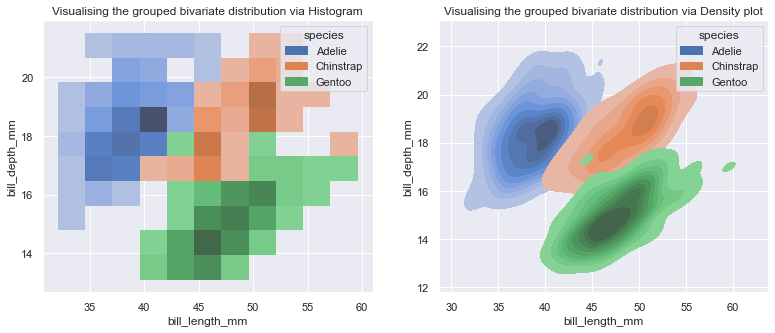

In [33]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

sns.histplot(x = 'bill_length_mm', y = 'bill_depth_mm', data = peng, hue="species", ax = ax[0]).set_title("Visualising the grouped bivariate distribution via Histogram")
sns.kdeplot(x = 'bill_length_mm', y = 'bill_depth_mm', data = peng, hue="species", ax = ax[1], fill=True).set_title("Visualising the grouped bivariate distribution via Density plot")
plt.show()

Thanks to the `sns.jointplot()` function it is also possible to investigate the relationship between two variables using a standard scatterplot and, jointly, visualise the data distribution by adding a histogram or a density plot on the margins: 

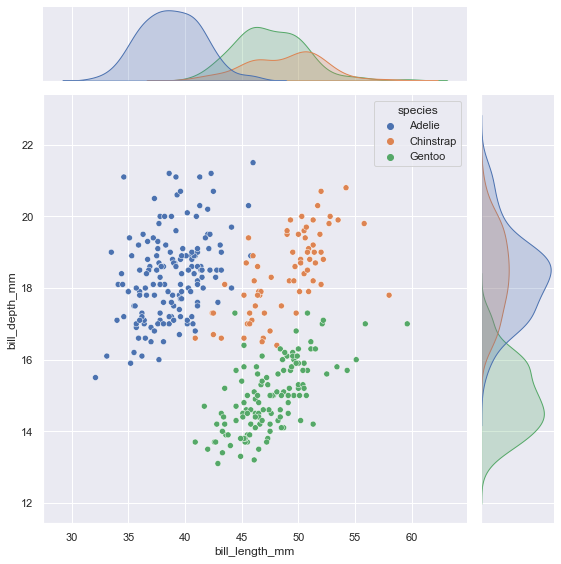

In [5]:
sns.jointplot(data=peng, x="bill_length_mm", y="bill_depth_mm", hue = 'species', height=8)
plt.show()

Finally, the `sns.rugplot()` function can be used to **add "rugs" on the side of another plot**, which allows us to get a general idea on how the data is distributed within each axis/variable. This is very useful in scatterplots, especially in cases where there are a lot of observations and their overlap makes it harder to visualise areas of higher data density. 

Let's see an example of how to add a `sns.rugplot()` to a `sns.scatterplot()`:

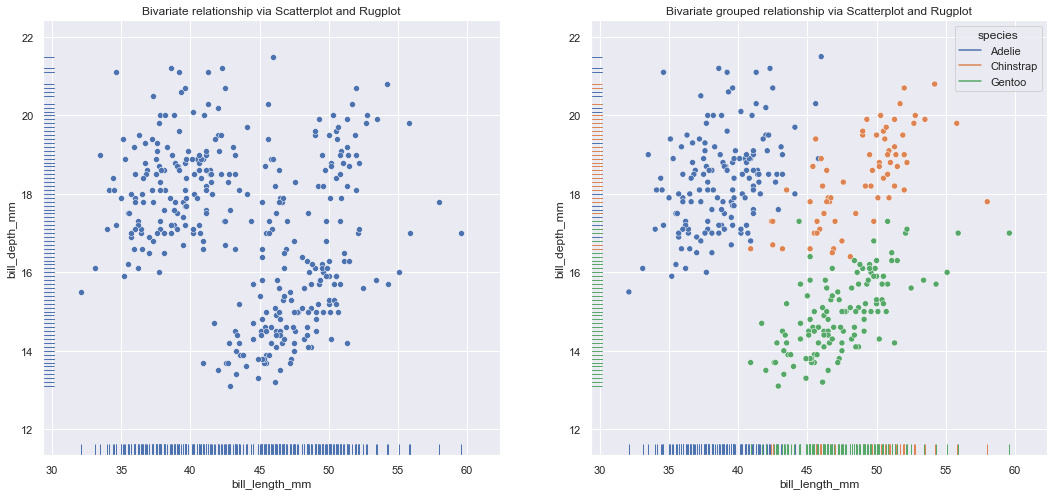

In [35]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(18, 8)

sns.scatterplot(data=peng, x="bill_length_mm", y="bill_depth_mm", ax=ax[0]).set_title("Bivariate relationship via Scatterplot and Rugplot")
sns.rugplot(data=peng, x="bill_length_mm", y="bill_depth_mm", ax=ax[0])

sns.scatterplot(data=peng, x="bill_length_mm", y="bill_depth_mm", hue='species', ax=ax[1]).set_title("Bivariate grouped relationship via Scatterplot and Rugplot")
sns.rugplot(data=peng, x="bill_length_mm", y="bill_depth_mm", hue='species', ax=ax[1])

plt.show()

### Correlation

Since we're talking about the relationship between two variables, we should also introduce the concept of **correlation**, which denotes the statistical relationship, whether causal or not, between two variables. Specifically, in statistics it normally refers to **the degree to which a pair of variables are linearly related**. 

<img src="img/correlation.svg" width="500">

At this point it is important to stress the fact that **correlation does not imply causation**, which means that just because two variables have a strong direct or inverse relationship (ie: they "move" together), one is not necessarily causing the other to do so. The following meme is very representative of this fact: 

<img src="img/correlation-causation.jpeg" width="400">

When this happens, that is, when we have correlation but there is clearly no causation, we talk about **spurious correlation**. Make sure you [check out this page](https://www.tylervigen.com/spurious-correlations) for some amusing examples of spurious correlations. 

The most popular measure of dependence is **Pearson's correlation coefficient**, which is given by the following formula and it produces a value that indicates the **stength and direction of the relationhip** between the two variables. 

$$
    \begin{equation*}
  r =
  \frac{ \frac{1}{N} \sum_{i=1}^{n}(x_i-\mu_x)(y_i-\mu_y) }{%
        \sigma_x \sigma_y}
\end{equation*}
$$

Its **range of possible values** is [-1, 1], where: 

- `-1` means perfect negative correlation (inverse relationship)
- ` 0` means no correlation
- ` 1` means perfect positive correlation (direct relationship)

In Python there are many ways to calculate the correlation coefficient; in `pandas` we can use the `.corr()` method and calculate Pearson's correlation coefficient between `bill_length_mm` and `bill_depth_mm` like this: 

In [6]:
peng['bill_length_mm'].corr(peng['bill_depth_mm'])

-0.2350528703555326

This means that there is a very feeble negative correlation between the length and depth of a penguin's bill, which is quite suspicious. In fact, looking again at the scatterplot above, we can see that the data as a whole has a weak inverse relationship, but if we look at each `species` group, the correlation changes and becomes a positive direct relationship. 

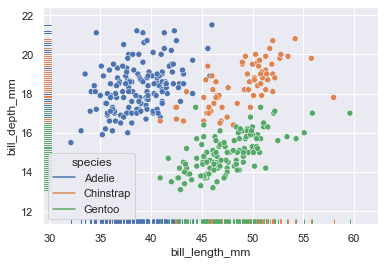

In [7]:
sns.scatterplot(data=peng, x="bill_length_mm", y="bill_depth_mm", hue='species')
sns.rugplot(data=peng, x="bill_length_mm", y="bill_depth_mm", hue='species')

plt.show()

In fact, let's re-calculate the correlation coefficient for each `species`: 

In [8]:
for spec in peng['species'].unique():
    cor = peng[peng.species==spec]['bill_length_mm'].corr(peng[peng.species==spec]['bill_depth_mm'])
    print(spec, '-->', round(cor, 2))

Adelie --> 0.39
Chinstrap --> 0.65
Gentoo --> 0.64


It is also possible, and very common, to compute a **correlation matrix**, that is, given a set of $n$ numeric variables, we can generate an $n*n$ matrix containing all the correlation coefficients between those variables (note that the correlation of a variable with itsel is always 1). 

In [9]:
peng[peng.species=='Chinstrap'].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.653536,0.471607,0.513638
bill_depth_mm,0.653536,1.000000,0.580143,0.604498
flipper_length_mm,0.471607,0.580143,1.000000,0.641559
body_mass_g,0.513638,0.604498,0.641559,1.000000


Finally, if we want to visually explore the relationship between $n$ variables, we can use the `sns.pairplot()` function to generate a series of charts that show how each variable is related to the other. Using the usual `hue=` parameter, we can highlight and group data by a specific categorical variable. 

Note that: 

- the scatterplots on the top-right section are a mirrored version of those on the bottom-left section (same data with swapped axis); 
- on the diagonal of the metrics we can find the histograms of each variable; 
- if we group our data via the `hue=` parameter, we will see density plots instead of histograms on the matrix diagonal. 

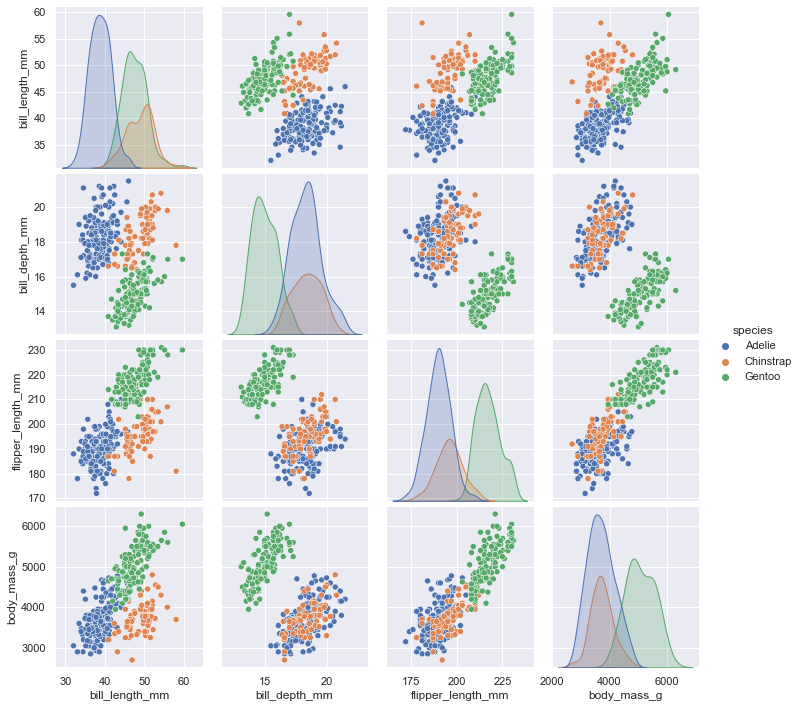

In [11]:
sns.pairplot(peng, hue = 'species')
plt.show()

<AxesSubplot:>

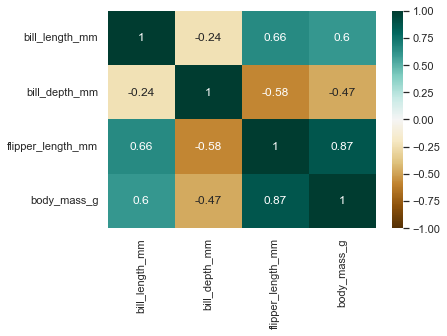

In [13]:
sns.heatmap(peng.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

***

### Fun fact: Benford's Law

According to the homonymous [Wikipedia page](https://en.wikipedia.org/wiki/Benford%27s_law#Examples): 

> **Benford's law**, is an observation that *in many real-life sets of numerical data, the leading digit is likely to be small*. In sets that obey the law, the number 1 appears as the leading significant digit about 30 % of the time, while 9 appears as the leading significant digit less than 5 % of the time. Note that, if the digits were distributed uniformly, they would each occur about 11.1 % of the time.

Below is a graphical representation of Benford's law: 

*Notice that the data used to populate the chart has been taken directly from the Wikipedia page using the `wikipedia` library (expand the cell below to see the relative code)*

In [16]:
!pip install wikipedia
import wikipedia as wp
#wp.search('Benford')
page = wp.page("Benford")
html = page.html().encode("UTF-8")
bl = pd.read_html(html)[0]
bl.columns = ['ix', 'benford', 'to_drop']
bl.drop(columns=['to_drop'], inplace=True)
# remove % sign and convert to probability 
bl['benford'] = bl['benford'].str.replace('%', '').astype('float')/100
#bl

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=1d046d171ab1a4d00342a3679e946de6ae44e2e3486cf6c02e7bf12c1de523f2
  Stored in directory: /Users/carmi/Library/Caches/pip/wheels/c2/46/f4/caa1bee71096d7b0cdca2f2a2af45cacf35c5760bee8f00948
Successfully built wikipedia


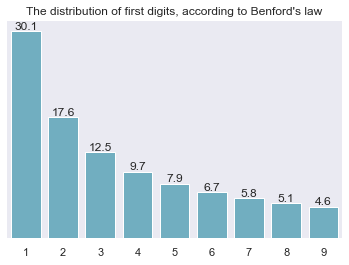

In [ ]:
ax = sns.barplot(x=bl['ix'], y=bl['benford']*100, color='c')
ax.bar_label(ax.containers[0])
ax.get_yaxis().set_visible(False)
ax.set(xlabel=None)
ax.set(title='The distribution of first digits, according to Benford\'s law')
sns.despine(left=True, bottom=True)
plt.show()

As a first example, let's consider the following expression: 

$$
    \Bigl\{2^n\Bigl\}_{n=0}^{N} = \{2^0, 2^1, 2^2, 2^3, 2^4, ..., 2^{N}\}
$$ 

If we extract the first digit from each number resulting from the sequence, we should notice a very close adherence to Benford’s law. To demonstrate this fact we'll proceed in the following manner: 

1. Create a DataFrame `bl` that contains the theoretical values given by Benford's Law (we already have such DF from the code that generated the chart above); 
2. Generate the sequence $2^n$ for the first 100 integers (that is, $N=100$) and save them to a DataFrame named `two_n` having a `n` column containing the integer and a `2n` column containing the result of the expression; 
3. Extract the first digit from each element of the sequence and save it to a new column `2n_first_digit` in the `two_n` DataFrame; 
4. Generate a frequency table for all elements in the `two_n['2n_first_digit']`; 
5. Save the results to a new DataFrame named `two_n_freq`;
6. Merge the frequency table `two_n_freq` with the DataFrame containing the theoretical values of Benford's law `bl` and create a new DF `two_n_bl`; 
7. Plot the the density function of the two columns side by side; 
8. To get a single metric that tells us how close to the theoretical values of Benford's law our data is, let's compute an accuracy metric, technically known as the Mean Absolute Percentage Error (MAPE): 
    1. calculate the differences between the values of the frequency table and Benford's law theoretical values
    2. take the absolute values using `np.abs()`
    3. take the mean using `np.mean()`
    4. multiply by 100 to get a percentage

In [17]:
# 1. Create a DataFrame `bl` that contains the theoretical values given by Benford's Law
bl

,ix,benford
0,1,0.301
1,2,0.176
2,3,0.125
3,4,0.097
4,5,0.079
5,6,0.067
6,7,0.058
7,8,0.051
8,9,0.046


In [18]:
# 2. Generate the sequence 2^n for the first 100 integers (that is, N=100) and save them to a DataFrame named two_n; 
two_n = pd.DataFrame({'n': range(0, 101), 
                      '2n': [2**n for n in range(0, 101)]})
two_n.sample(5)

,n,2n
4,4,16
51,51,2251799813685248
33,33,8589934592
34,34,17179869184
50,50,1125899906842624


In [ ]:
# 3. Extract the first digit from each element of the sequence and save it to a new column `2n_first_digit` in the `two_n` DataFrame; 
two_n['2n_first_digit'] = [int(str(el)[0]) for el in two_n['2n']]
two_n.sample(5)

,n,2n,2n_first_digit
41,41,2199023255552,2
6,6,64,6
43,43,8796093022208,8
53,53,9007199254740992,9
80,80,1208925819614629174706176,1


In [ ]:
# 4. Generate a frequency table for all elements in the two_n['2n_fd'];
two_n['2n_first_digit'].value_counts(normalize=True)

1    0.306931
2    0.168317
3    0.128713
4    0.099010
6    0.069307
5    0.069307
7    0.059406
8    0.049505
9    0.049505
Name: 2n_fd, dtype: float64

In [ ]:
# 5. Save the results to a new DataFrame named two_n_freq;
two_n_freq = pd.DataFrame({'ix': two_n['2n_first_digit'].value_counts(normalize=True).index, 
                         'first_digit_freq': two_n['2n_first_digit'].value_counts(normalize=True).values})
two_n_freq

,ix,first_digit_freq
0,1,0.306931
1,2,0.168317
2,3,0.128713
3,4,0.099010
4,6,0.069307
5,5,0.069307
6,7,0.059406
7,8,0.049505
8,9,0.049505


In [ ]:
# 6. Merge the frequency table (two_n_freq) with the DataFrame containing the theoretical values of Benford's law (bl) 
#    and create a new DF `two_n_bl`
two_n_bl = two_n_freq.merge(bl, on='ix')
two_n_bl

,ix,first_digit_freq,benford
0,1,0.306931,0.301
1,2,0.168317,0.176
2,3,0.128713,0.125
3,4,0.099010,0.097
4,6,0.069307,0.067
5,5,0.069307,0.079
6,7,0.059406,0.058
7,8,0.049505,0.051
8,9,0.049505,0.046


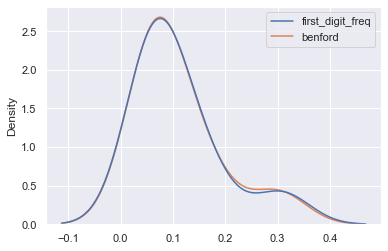

In [ ]:
# 7. Plot the the density function of the two columns side by side;  
sns.kdeplot(data=two_n_bl[['first_digit_freq', 'benford']])
plt.show()

In [ ]:
# 8. To get a single metric that tells us how close to the theoretical values of Benford's law our data is, 
#    let's compute an accuracy metric, technically known as the Mean Absolute Percentage Error (MAPE):
print('MAPE:', round(np.mean(np.abs(two_n_bl['first_digit_freq'] - two_n_bl['benford']))*100, 2), '%')

MAPE: 0.42 %


***
**Your turn!**

Check for Benford's Law in the `distance` variable from the `planets` dataset; in particular, make sure to produce: 

1. A frequency table showing the number of occurrences for each first digit of the `distance` variable
2. A chart showing two density plots comparing the dataset's frequency table and the theoretical values from Benford's law
3. Print to screen an accuracy measure that summarises how well this data conforms to Benford's Law

In [58]:
planet = sns.load_dataset('planets')
planet

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [59]:
plan_drop = pd.DataFrame(planet['distance'])
plan_drop['indice'] = plan_drop.index + 1
plan_drop= plan_drop[['indice', 'distance']]

In [61]:
plan_drop['distance'] = plan_drop['distance'].fillna(0, inplace=False)

In [63]:
plan_drop

,indice,distance
0,1,77.40
1,2,56.95
2,3,19.84
3,4,110.62
4,5,119.47
...,...,...
1030,1031,172.00
1031,1032,148.00
1032,1033,174.00
1033,1034,293.00


In [64]:
plan_drop['dist_bl'] = [int(str(el)[0]) for el in plan_drop['distance']]
plan_drop

,indice,distance,dist_bl
0,1,77.40,7
1,2,56.95,5
2,3,19.84,1
3,4,110.62,1
4,5,119.47,1
...,...,...,...
1030,1031,172.00,1
1031,1032,148.00,1
1032,1033,174.00,1
1033,1034,293.00,2


In [67]:
#two_n['2n_first_digit'].value_counts(normalize=True) 
#two_n_freq = pd.DataFrame({'ix': two_n['2n_first_digit'].value_counts(normalize=True).index, 
#                         'first_digit_freq': two_n['2n_first_digit'].value_counts(normalize=True).values})
#two_n_freq

freq_dist = pd.DataFrame({'ix':plan_drop['dist_bl'].value_counts(normalize=True).index, 'first_digit' : plan_drop['dist_bl'].value_counts(normalize=True).values})
freq_dist

,ix,first_digit
0,0,0.219324
1,1,0.205797
2,3,0.140097
3,2,0.121739
4,4,0.090821
5,5,0.077295
6,6,0.058937
7,8,0.033816
8,7,0.027053
9,9,0.025121
